In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys

sys.path.append('../data')
from data_loading import jets_from_pythia_txt
from JetImages import JetImage

kappa = 0.2
jet_images : np.ndarray = np.empty((0, 2, JetImage.pixels_per_dim, JetImage.pixels_per_dim), dtype=np.float64)

print("\nLoading jets from files. Currently on seed: ", end='')
for seed in range(1,5):
    if (seed-1) % 5 == 0:
        print("{}...".format(seed), end='')

    fname = "../data/up_down/1000GEV-downquark-seed{}.txt".format(seed)

    new_images = np.stack([JetImage.two_channel_image(jet, kappa) for jet in jets_from_pythia_txt(fname)])
                      
    jet_images = np.concatenate((jet_images, new_images), axis=0)



Loading jets from files. Currently on seed: 1...

In [65]:
# Normalize the whole image by the sum of its pixels in each channel
first_channel = jet_images[:,0,:,:]
num_images = first_channel.shape[0]
first_channel = first_channel.reshape(num_images,1,33,33)

normalized = first_channel /  np.sum(first_channel, axis=(2,3), keepdims=True)

# Zero-center each channel's pixels by the corresponding average over all images
zero_centered = normalized - np.mean(normalized, axis=(0), keepdims=True)

# Standardize each channel by the channel-standard-deviation over all images
for_noise_reduction = 1e-5
standardized = zero_centered /  (np.std(normalized, axis=(0), keepdims=True) + for_noise_reduction)

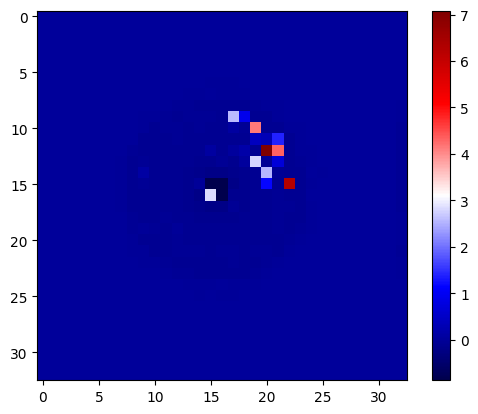

In [76]:
# m = normalized_images
# m = zero_centered_images
# m = standardized_images

# to_plot = np.mean(standardized, axis=0)[0,:,:]
to_plot = standardized[5,0,:,:]

import matplotlib.pyplot as plt
plt.imshow(to_plot, cmap='seismic')
plt.colorbar()

In [4]:
import numpy as np

jet_images = None
jet_images = np.load("../data/up_down/100GEV-downquark-jet-images.npy")

In [19]:
print(means.shape)

(1, 1, 33, 33)


In [29]:
def zero_center(*args, channels = [], copy = False):

    """ Subtracts the mean of arg[0,channels] from the other arguments.
    Assumes that the arguments are numpy arrays. The expected use case would
    be zero_center(X_train, X_val, X_test).

    channels: which channels to zero_center. The default will lead to all
              channels being affected.
    copy: if True, the arguments are unaffected. if False, the arguments
          themselves may be modified
    """

    assert len(args) > 0

    # # treat channels properly
    # if len(args(channels)) == 0:
    #     channels = np.arange(args[0].shape[1])
    # else:
    #     channels = args(channels)

    # compute mean of the first argument
    mean = np.mean(args[0], axis = 0)

    # copy arguments if requested
    if copy:
        X = [np.copy(arg) for arg in args]
    else:
        X = args

    # iterate through arguments and channels
    for x in X:
        for chan in channels:

            # use broadcasting to do the heavy lifting here
            x[:,chan] -= mean[chan]

    return X

old_zeroed = zero_center(normalized, channels=[0], copy=True)

new_zeroed = normalized - np.mean(normalized, axis=(0), keepdims=True)

np.sum(np.abs(old_zeroed - new_zeroed))


In [59]:
print("Min, max, sum, and average of old zeroed: ", np.min(old_zeroed), np.max(old_zeroed), np.sum(old_zeroed), np.mean(old_zeroed))
print("Min, max, sum, and average of new zeroed: ", np.min(new_zeroed), np.max(new_zeroed), np.sum(new_zeroed), np.mean(new_zeroed))

Min, max, sum, and average of old zeroed:  -0.21317049478121708 0.843927602873133 5.219543807583049e-11 1.1982423800695705e-18
Min, max, sum, and average of new zeroed:  -0.21317049478121708 0.843927602873133 5.219543807583049e-11 1.1982423800695705e-18


In [44]:
def standardize(*args, channels = [], copy = False, reg = 10**-6):

    """ Normalizes each argument by the standard deviation of the pixels in 
    arg[0]. The expected use case would be standardize(X_train, X_val, X_test).

    channels: which channels to zero_center. The default will lead to all
              channels being affected.
    copy: if True, the arguments are unaffected. if False, the arguments
          themselves may be modified
    reg: used to prevent divide by zero 
    """

    assert len(args) > 0

    # treat channels properly
    # if len(parg(channels)) == 0:
    #     channels = np.arange(args[0].shape[1])
    # else:
    #     channels = parg(channels)

    stds = np.std(args[0], axis = 0) + reg

    # copy arguments if requested
    if copy:
        X = [np.copy(arg) for arg in args]
    else:
        X = args

    # iterate through arguments and channels
    for x in X:
        for chan in channels:

            # use broadcasting to do the heavy lifting here
            x[:,chan] /= stds[chan]

    return X


old_standardized = standardize(normalized, channels=[0], copy=True)
new_standardized = normalized / (np.std(normalized, axis=(0), keepdims=True) + for_noise_reduction)

np.sum(np.abs(old_standardized - new_standardized))

34188.42802278593

In [60]:
for_noise_reduction

1e-05

In [55]:
np.sum(old_zeroed)

5.219543807583049e-11